In [7]:
# Parameters' cell
setting = "c" # or "c"
code_unconstrained = 100
code_controlled = 15

In [8]:
import json
import pprint

import pandas as pd
import plotly.express as px
import plotly.io as pio
import requests

# pio.renderers.default = 'notebook_connected'
SAMPLING_FREQ = 100  # Hz

In [9]:
if setting=="u":
    code = f"{setting}-{code_unconstrained}"
elif setting=="c":
    code = f"{setting}-{code_controlled}"
    
df = pd.read_parquet(f"https://charles.doffy.net/files/FallData/{code}.parquet",
                     engine="fastparquet")
metadata = json.loads(
    requests.get(f"https://charles.doffy.net/files/FallData/{code}.json").text
)

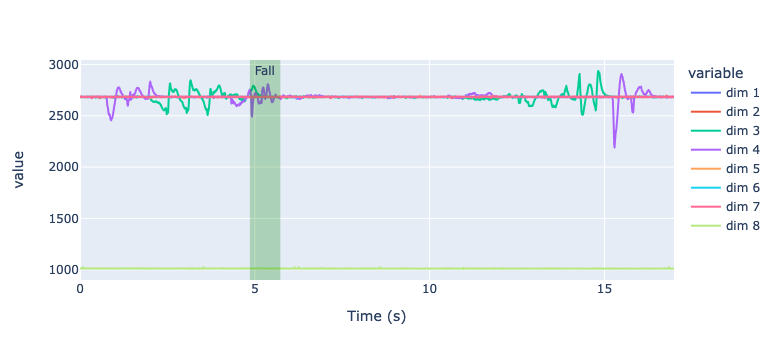

In [10]:
fig = px.line(df)

if setting=="c":  # controlled setting

    fig.add_vrect(x0=metadata["FallEventStart"] / SAMPLING_FREQ,
                  x1=metadata["FallEventEnd"] / SAMPLING_FREQ,
                  annotation_text="Fall", annotation_position="top",
                  fillcolor="green", opacity=0.25, line_width=0)

elif setting=="u":  # unconstrained setting
    fig.add_vline(x=metadata["FallEvent"] / SAMPLING_FREQ,
                  line_width=1, line_dash="dash", line_color="green",
                  annotation_text="Fall")
    
fig.show()

In [5]:
fig.write_image("output.png")

In [11]:
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(metadata)

{   'Code': 'c-15',
    'FallEvent': 529,
    'FallEventEnd': 573,
    'FallEventStart': 486,
    'Length': 17.0,
    'Setting': 'Controlled',
    'TypeOfFall': 'BackwardFromStanding'}
